# CSCI 4022 Project  
Caleb Caulk, Tyler Moll, Kevin Jacob  
In this project we will use a data set of star data and run a clustering algorithm to determine the type of star it is. We will be using the hyg version 3 star data from this repository https://github.com/astronexus/HYG-Database because it contains 119,614 stars and provides several data points for each star.  
Generally stars follow this format 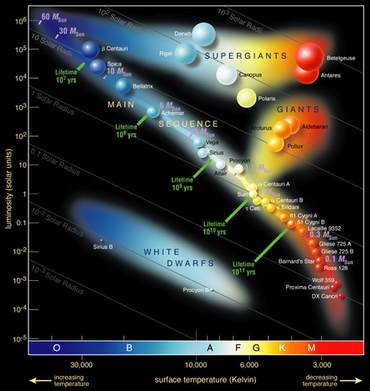  
Where the stars fit into a classification of main sequence stars, white dwarfs (Remnants of a low mass main sequence star that has left behind the core after losing the outer layers in a planetary nebula), and Giants, but as you can see form the diagram stars are in a classification of O,B,A,F,G,K,M that goes from hotest to coolest star surface temperatures.  
# Database description
The database set linked above with 199,614 stars has 25 fields of description each listed below and the general explanation if needed and the most likely important ones noted. All descriptions come from https://github.com/astronexus/HYG-Database as the source. 
1. id: The database primary key  
2. hip: The star's ID in the Hipparcos catalog, if known **(Catalog of measurements of the star)**
3. hd: The star's ID in the Henry Draper catalog, if known **(Another Catalog)**  
4. hr: The star's ID in the Harvard Revised catalog, which is the same as its number in the Yale Bright Star Catalog **(Another Catalog)**  
5. gl: The star's ID in the third edition of the Gliese Catalog of Nearby Stars **(Another Catalog)**  
6. bf: The Bayer / Flamsteed designation, primarily from the Fifth Edition of the Yale Bright Star Catalog. This is a combination of the two designations. The Flamsteed number, if present, is given first; then a three-letter abbreviation for the Bayer Greek letter; the Bayer superscript number, if present; and finally, the three-letter constellation abbreviation. Thus Alpha Andromedae has the field value "21Alp And", and Kappa1 Sculptoris (no Flamsteed number) has "Kap1Scl" **(Another Catalog)**  
7. ra, dec: The star's right ascension and declination, for epoch and equinox 2000.0 **(location in space relative to Earth)**  
8. proper: A common name for the star, such as "Barnard's Star" or "Sirius". These are taken from the International Astronomical Union **(Common name of the star)**  
9. dist: The star's distance in parsecs, the most common unit in astrometry. To convert parsecs to light years, multiply by 3.262. A value >= 100000 indicates missing or dubious (e.g., negative) parallax data in Hipparcos. **(Distance in parsec from Sun I think and over 100,000 is bad data so don't use)**  
10. pmra, pmdec: The star's proper motion in right ascension and declination, in milliarcseconds per year. **(how much the star moves)**  
11. rv: The star's radial velocity in km/sec, where known **(How fast the star is moving usually towards (negative) or away form Earth)** 
12. mag: The star's apparent visual magnitude. **(How big the star looks)**   
13. absmag: The star's absolute visual magnitude (its apparent magnitude from a distance of 10 parsecs) **(How big the star looks from 10 parsec)**  
14. spect: The star's spectral type, if known **(O, B, A, F, G, K, and M based on surface temp)**
15. ci: The star's color index (blue magnitude - visual magnitude), where known **(Number to help determine Spectral type)**  
16. x,y,z: The Cartesian coordinates of the star, in a system based on the equatorial coordinates as seen from Earth. +X is in the direction of the vernal equinox (at epoch 2000), +Z towards the north celestial pole, and +Y in the direction of R.A. 6 hours, declination 0 degrees **(More position data )**  
17. vx,vy,vz: The Cartesian velocity components of the star, in the same coordinate system described immediately above. They are determined from the proper motion and the radial velocity (when known). The velocity unit is parsecs per year; these are small values (around 1 millionth of a parsec per year), but they enormously simplify calculations using parsecs as base units for celestial mapping **(Velcoity data that will show where the stars are moving)**  
18. rarad, decrad, pmrarad, pmdecrad: The positions in radians, and proper motions in radians per year **(More motion and position data in a different format)**  
19. bayer: The Bayer designation as a distinct value **(A way to name the stars based on constellations)**  
20. flam: The Flamsteed number as a distinct value **(Another way to name/ number brihgt stars)**  
21. con: The standard constellation abbreviation **(Constellation)**  
22. comp, comp_primary, base: Identifies a star in a multiple star system. comp = ID of companion star, comp_primary = ID of primary star for this component, and base = catalog ID or name for this multi-star system. Currently only used for Gliese stars **(More naming stuff I think)**  
23. lum: Star's luminosity as a multiple of Solar luminosity **(Luminosity)**  
24. var: Star's standard variable star designation, when known **(Unique identifier to varaible stars where a varaible star is a star whose brightness changes overtime)**  
25. var_min, var_max: Star's approximate magnitude range, for variables. This value is based on the Hp magnitudes for the range in the original Hipparcos catalog, adjusted to the V magnitude scale to match the "mag" field **(Not super sure)**
### Probable important data  
Numbers 8,9,11,12,13,14,15,16,17,23,24 and 25

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random

In [3]:
#reading in the data that we will use to cluster
df=pd.read_csv("hyg.csv")

In [4]:
#cleaning up the data with stuff we do not need based on evaluation above
df.drop(["hr","hip","hd","gl","bf","ra","dec","pmra","pmdec","rarad","decrad","pmrarad","pmdecrad","bayer","flam","con","comp",
         "comp_primary","base"], axis = 1)

,id,proper,dist,rv,mag,absmag,spect,ci,x,y,z,vx,vy,vz,lum,var,var_min,var_max
0,0,Sol,0.0000,0.0,-26.70,4.850,G2V,0.656,0.000005,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,NaN,NaN,NaN
1,1,NaN,219.7802,0.0,9.10,2.390,F5,0.482,219.740502,0.003449,4.177065,4.000000e-08,-0.000006,-2.000000e-06,9.638290,NaN,NaN,NaN
2,2,NaN,47.9616,0.0,9.27,5.866,K3V,0.999,45.210918,0.003365,-16.008996,-7.000000e-08,0.000042,-2.000000e-07,0.392283,NaN,NaN,NaN
3,3,NaN,442.4779,0.0,6.61,-1.619,B9,-0.019,344.552785,0.030213,277.614965,3.920000e-06,0.000011,-4.860000e-06,386.901132,NaN,NaN,NaN
4,4,NaN,134.2282,0.0,8.06,2.421,F0V,0.370,82.835513,0.012476,-105.619540,8.000000e-08,0.000041,6.000000e-08,9.366989,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119609,119611,NaN,16.9492,0.0,12.64,11.494,m,NaN,13.240128,-0.125297,10.581054,8.220000e-06,-0.000013,-1.044000e-05,0.002200,NaN,NaN,NaN
119610,119612,NaN,16.7224,0.0,16.10,14.984,m,1.870,11.240971,-0.008954,12.380596,1.273000e-05,0.000070,-1.149000e-05,0.000088,NaN,NaN,NaN
119611,119613,NaN,18.5185,0.0,12.82,11.482,M7,1.640,13.305832,-0.013199,-12.879810,1.682000e-05,-0.000002,1.737000e-05,0.002224,NaN,NaN,NaN
119612,119614,NaN,12.8205,0.0,12.80,12.260,M4,NaN,10.614642,-0.006882,-7.189893,-2.172000e-05,0.000045,-3.214000e-05,0.001086,NaN,NaN,NaN


Text(0.5, 1.0, 'Hertzsprung-Russell Diagram')

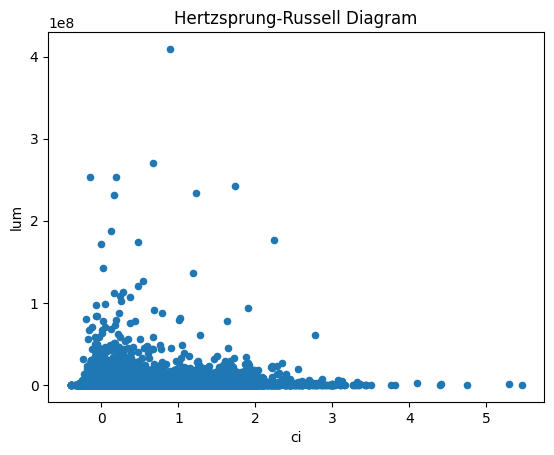

In [32]:
#printing the stars with no data manipulation
ax1 = df.plot.scatter(x = "ci", y = "lum")
ax1.set_title("Hertzsprung-Russell Diagram")

Since the graph above looks nothing like the Hertzsprung-Russell Diagram we would expect we have to do a little data manipulation. The max luminosity is almost 410000000 which is huge compare to 1 so we will take the log of the y axis

In [27]:
print("Max luminosity of the a star as a multiple of the Sun's luminosity", max(df["lum"]))
logLum = np.log10(df["lum"])
print("Max luminosity of the a star as a multiple of the log(Sun's luminosity)", max(logLum))
print("Min ci", min(df["ci"]), "\nMax ci", max(df["ci"]))

Max luminosity of the a star as a multiple of the Sun's luminosity 409260659.730011
Max luminosity of the a star as a multiple of the log(Sun's luminosity) 8.612
Min ci -0.4 
Max ci 5.46


Text(0.5, 1.0, 'Hertzsprung-Russell Diagram')

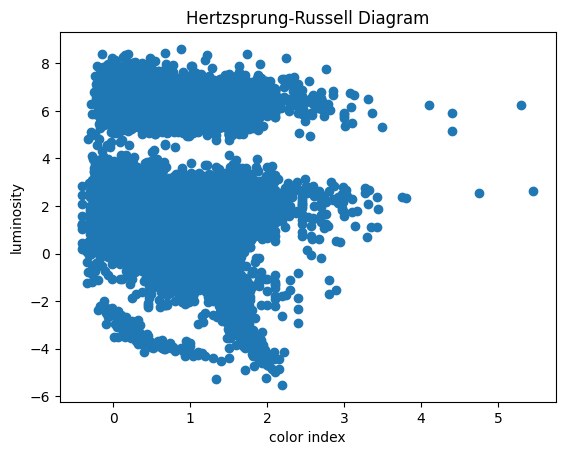

In [30]:
f1 = plt.figure()
plt.scatter(df["ci"],logLum)
plt.xlabel("color index")
plt.ylabel("luminosity")
plt.title("Hertzsprung-Russell Diagram")

Looks a little better...

In [48]:
f2 = plt.figure()
plt.figure(figsize=(150,150))
plt.scatter(df["ci"],logLum)
plt.xlabel("color index",fontsize = 150)
plt.ylabel("luminosity", fontsize = 150)
plt.title("Hertzsprung-Russell Diagram", fontsize = 150)

AttributeError: PathCollection.set() got an unexpected keyword argument 'fontsize'

<Figure size 640x480 with 0 Axes>

When we r